In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, fftfreq
from pydub import AudioSegment
from pydub.playback import play

In [2]:
audio = AudioSegment.from_wav('Sound_Files/All_C_1/6_7.wav')
audio

In [61]:
class Analyzer:

    def __init__(self, file_path):
        self.audio = AudioSegment.from_wav(file_path)
        self.SAMPLE_RATE, self.data = wav.read(file_path)
        self.DURATION = len(self.audio)/1000
        self.xf, self.stft_out = None, None

    def play_file(self):
        return self.audio

    def split_audio(self, k=1):

        s = np.round(len(self.audio)/k)
        return [self.audio[i*s:(i+1)*s] for i in range(k)]
        # return np.split(self.audio,k)

    def get_data(self):
        return self.data

    def split_data(self, k=1):
        return np.split(self.data,k)

    def stft(self, k=1):
        arr = self.split_data(k)

        duration = self.DURATION / k
        # N = self.SAMPLE_RATE * self.DURATION
        N = int(self.SAMPLE_RATE * duration)

        self.xf = fftfreq(N, 1 / self.SAMPLE_RATE)
        return self.xf,[fft(arr[i]) for i in range(k)]

    def plot(self, l, r,k=1):
        cur_data, cur_out = self.stft(k)
        for ff in cur_out:
            plt.figure()
            plt.plot(cur_data,np.abs(ff))
            plt.xlim(l,r)
            plt.show()
        plt.show()

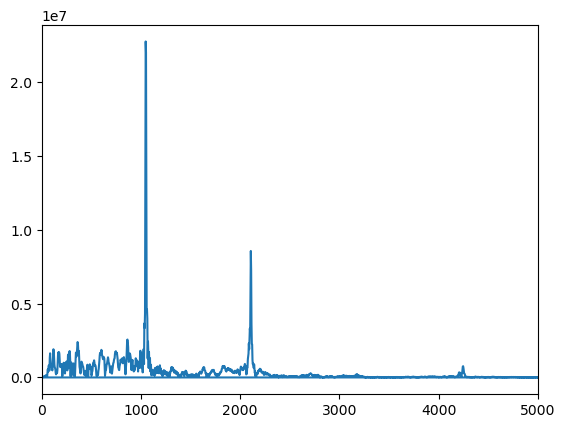

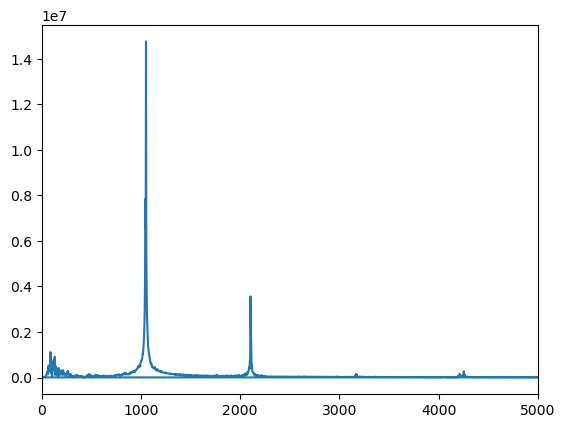

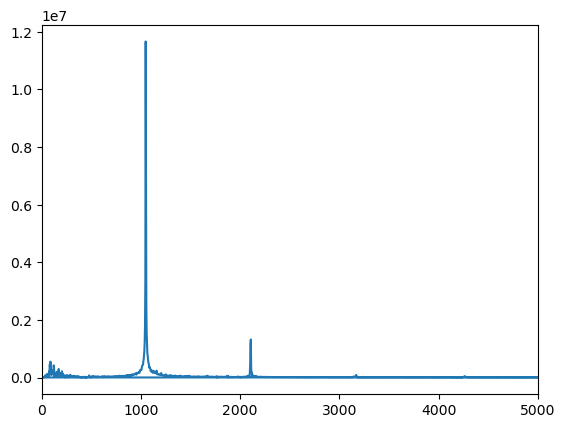

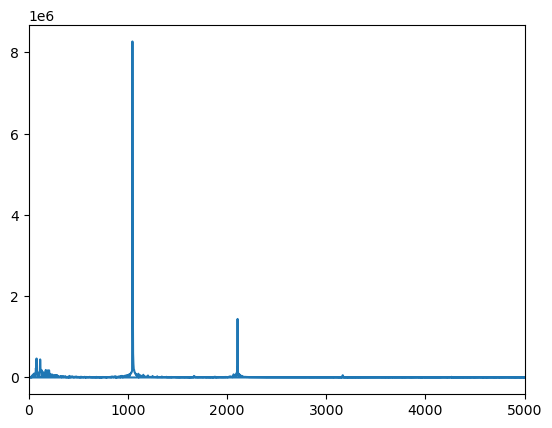

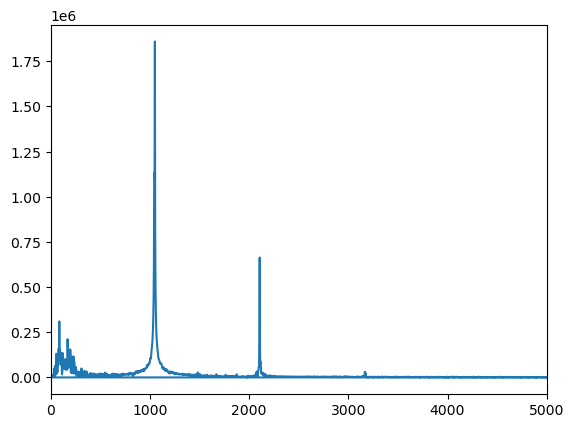

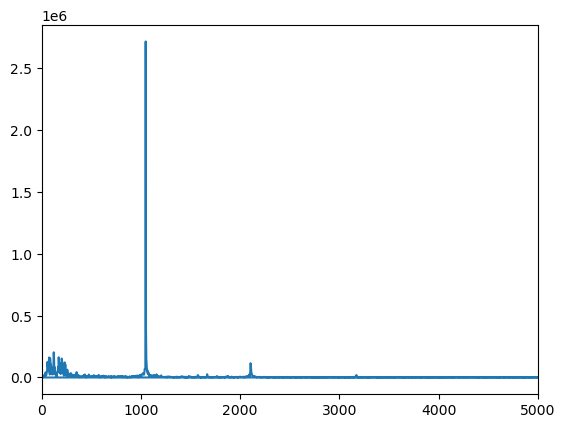

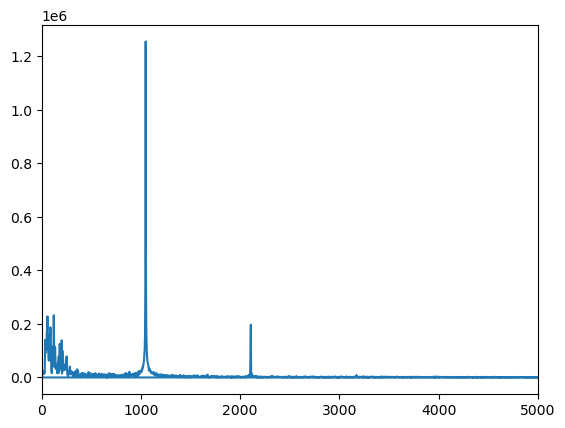

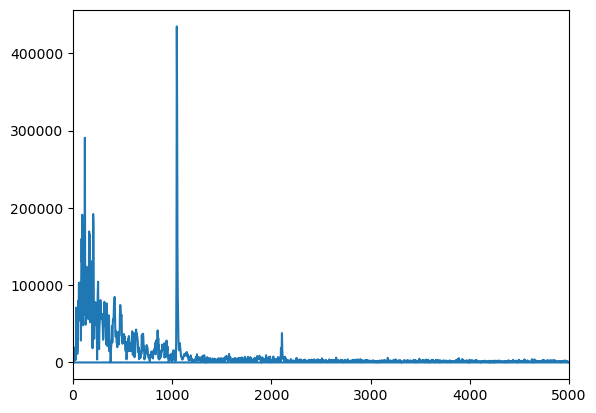

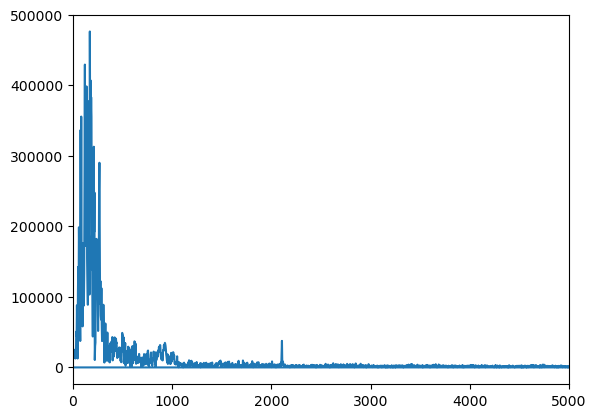

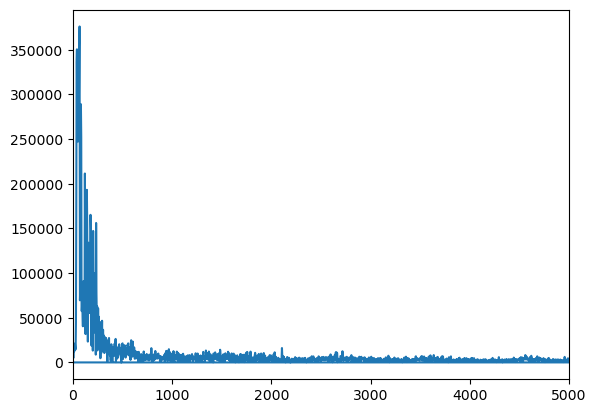

In [65]:
# Create an object with the path file
test = Analyzer('Sound_Files/All_C_1/6_7.wav')

# Plot graph for an stft with a left limit, right limit, and number of splits
test.plot(0,5000,10)

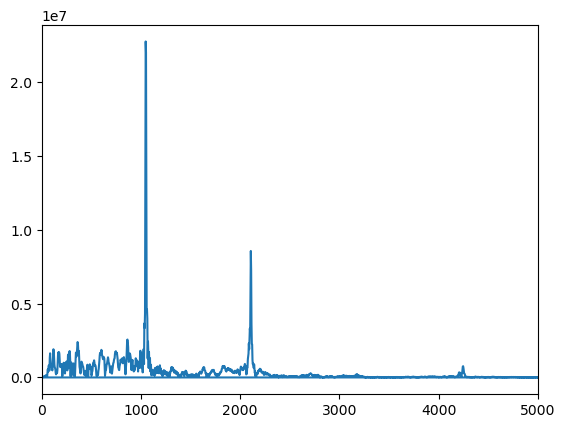

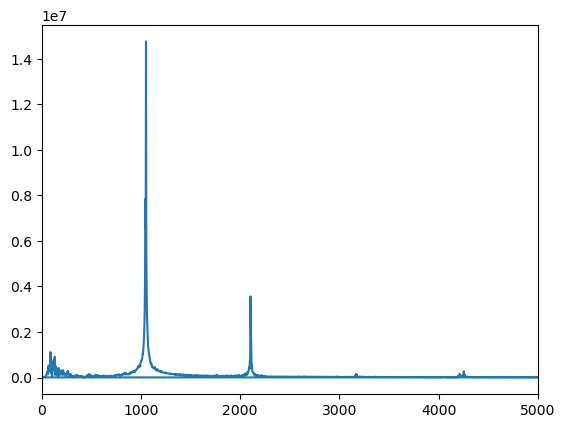

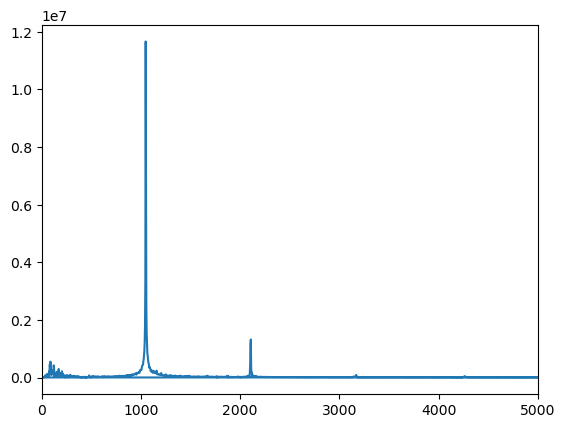

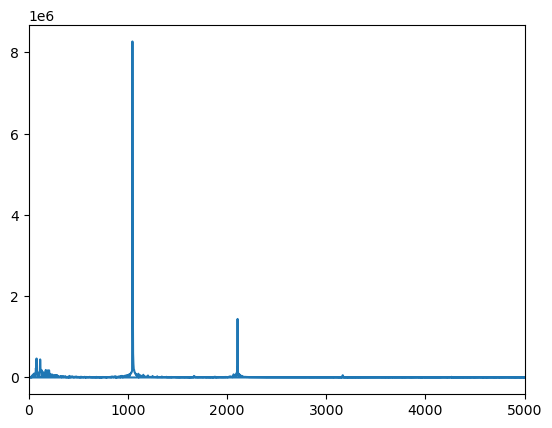

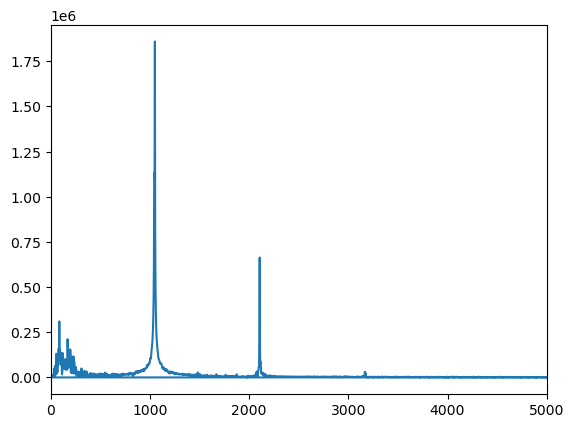

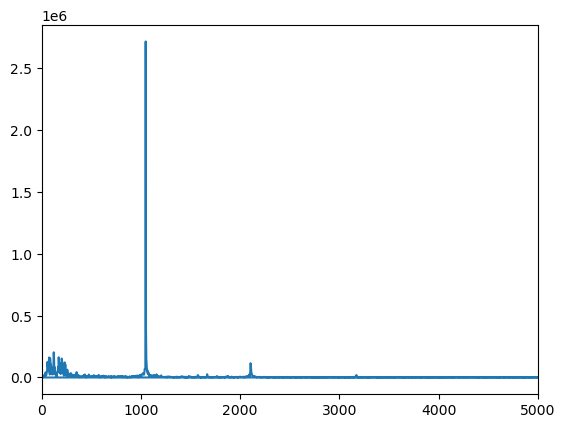

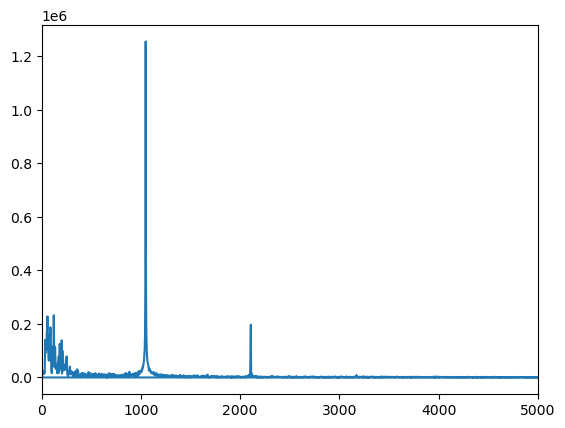

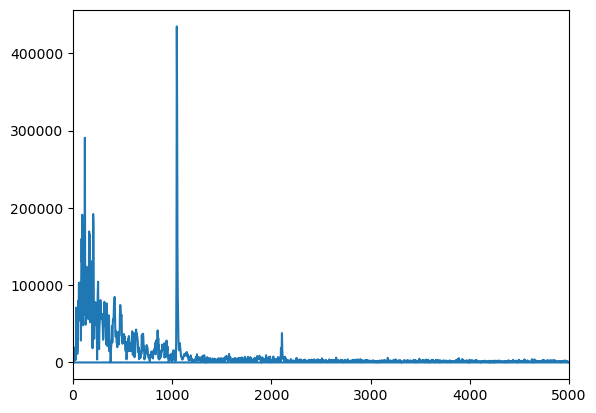

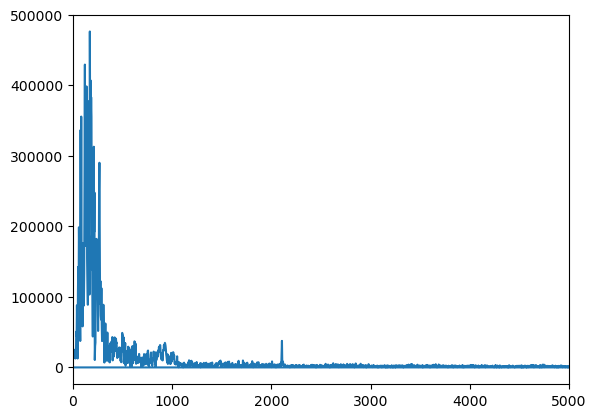

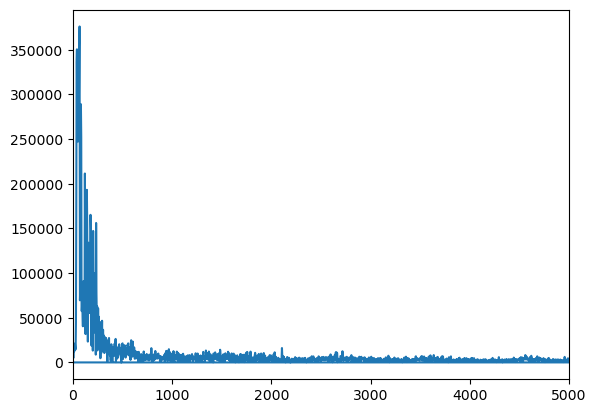